# Magma Simulator

In [1]:
import magma as m
import mantle

/opt/homebrew/lib/python3.7/site-packages/pysmt/walkers/generic.py:43: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if len(nodetypes) == 1 and isinstance(nodetypes[0], collections.Iterable):
/opt/homebrew/lib/python3.7/site-packages/ast_tools/immutable_ast.py:10: UserWarning: /opt/homebrew/lib/python3.7/site-packages/ast_tools/immutable_ast.py generated for (3, 6)does not match system version (3, 7)
  warnings.warn(f"{__file__} generated for (3, 6)"


## Simulating Combinational Circuits

Create a 2-input multiplexor.

In [2]:
Mux2 = mantle.Mux2
print(Mux2)

Mux2xNone(I0: In(Bit), I1: In(Bit), S: In(Bit), O: Out(Bit))


In [3]:
from magma.simulator import PythonSimulator

simulator = PythonSimulator(Mux2)

print('I0 I1 S O')
for i0 in [0, 1]:
    for i1 in [0, 1]:
        for s in [0, 1]:
            simulator.set_value(Mux2.I0, i0)
            simulator.set_value(Mux2.I1, i1)
            simulator.set_value(Mux2.S, s)
            simulator.evaluate()
            print(i0, i1, s, int(simulator.get_value(Mux2.O)))

I0 I1 S O
0 0 0 0
0 0 1 0
0 1 0 0
0 1 1 1
1 0 0 1
1 0 1 0
1 1 0 1
1 1 1 1


## Simulating Sequential Logic Circuits with Clocks

Create a 2-bit Counter.

In [4]:
Counter = mantle.DefineCounter(2)

print(Counter)

Counter2_COUT(O: Out(UInt[2]), COUT: Out(Bit), CLK: In(Clock))


Create a python simulator for the ice40.

In [5]:
from magma.simulator import PythonSimulator
from hwtypes import BitVector

simulator = PythonSimulator(Counter, clock=Counter.CLK)
O0 = []
O1 = []
COUT = []
for i in range(16):
    for j in range(2):
        simulator.advance()
        O = BitVector[2](simulator.get_value(Counter.O))
        O0.append(int(O[0]))
        O1.append(int(O[1]))
        COUT.append(simulator.get_value(Counter.COUT))

Use `matplotlib` to plot the output of the simulator.

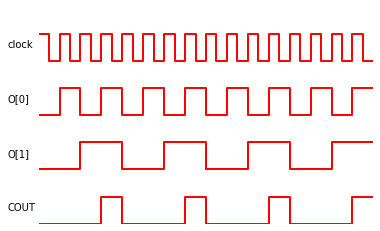

In [6]:
import matplotlib.pyplot as plt
import numpy as np

n = len(O1) // 2
t = np.repeat(0.5 * np.arange(2*n + 1) ,2)[1:-1]
clock = np.tile(np.array([1, 1, 0, 0]), n)

O0 = np.repeat(np.array(O0), 2)
O1 = np.repeat(np.array(O1), 2)
COUT = np.repeat(np.array(COUT), 2)


plt.text(-1.5, 3.25, 'clock')
plt.plot(t, 0.5*clock + 3, 'r', linewidth=2)
plt.text(-1.5, 2.25, 'O[0]')
plt.plot(t, 0.5*O0 + 2,    'r', linewidth=2)
plt.text(-1.5, 1.25, 'O[1]')
plt.plot(t, 0.5*O1 + 1,    'r', linewidth=2)
plt.text(-1.5, 0.25, 'COUT')
plt.plot(t, 0.5*COUT,      'r', linewidth=2)
plt.xlim([0, n])
plt.ylim([0, 4])

plt.gca().axis('off')
plt.show()